In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler


In [58]:
df = pd.read_csv("dataset/diamonds.csv", index_col=0)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53939 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53939 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [60]:
df.dropna(inplace=True)

In [61]:
df.duplicated().sum()

np.int64(146)

In [62]:
df.drop_duplicates(inplace=True)

In [63]:
df.describe(include="all")

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53792.000000,53792,53792,53792,53792.000000,53792.000000,53792.000000,53792.000000,53792.000000,53792.00000
unique,NaN,7,8,9,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21487,11261,13030,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797781,NaN,NaN,NaN,61.748080,57.458051,3933.107971,5.731211,5.734647,3.53871
std,0.473399,NaN,NaN,NaN,1.429933,2.233701,3988.182396,1.120715,1.141230,0.70505
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.00000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,951.000000,4.710000,4.720000,2.91000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.53000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5327.000000,6.540000,6.540000,4.03000


In [64]:
df.select_dtypes("object")

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


In [65]:
categorical_data =['cut', 'color','clarity']
for col in categorical_data:
    print(df[col].value_counts())
    print("##############################")

cut
Ideal        21487
Premium      13748
Very Good    12066
Good          4891
Fair          1598
ideal            1
very good        1
Name: count, dtype: int64
##############################
color
G    11261
E     9775
F     9520
H     8271
D     6755
I     5407
J     2802
e        1
Name: count, dtype: int64
##############################
clarity
SI1     13030
VS2     12229
SI2      9149
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
8           1
Name: count, dtype: int64
##############################


1. Cut Column Contain 5 values which ordinal data Ideal --> Premium --> Very Good --> Good -->Fair
2. color contain 7 values that is nominal data
3. clarity is Ordinal data which have 8 values IF > VVS1 > VVS2 > VS1 > VS2 > SI1 > SI2 > I1


In [66]:
df = df[df['clarity'] != '8']
df['color'] = df['color'].replace({'e': 'E'})
df['cut'] = df['cut'].replace({
    'ideal': 'Ideal',
    'very good': 'Very Good'
})

C:\Users\Elsherbiny\AppData\Local\Temp\ipykernel_11028\1557583563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'] = df['color'].replace({'e': 'E'})
C:\Users\Elsherbiny\AppData\Local\Temp\ipykernel_11028\1557583563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cut'] = df['cut'].replace({


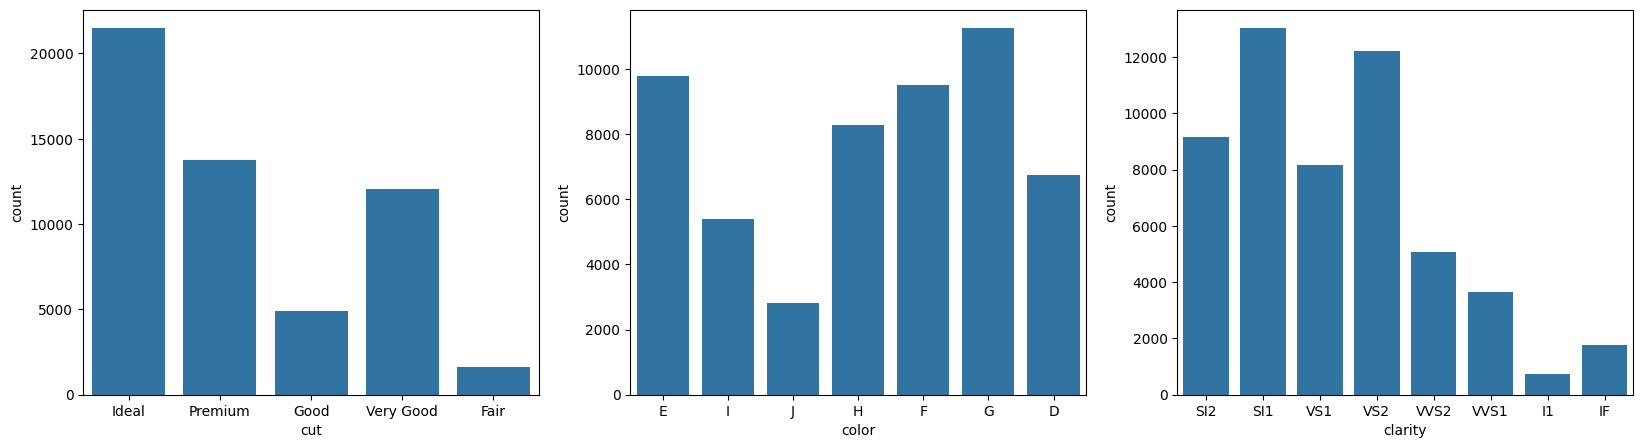

In [67]:
plt.figure(figsize=(20,5))
for i, col in enumerate(categorical_data, start=1):
    plt.subplot(1,3,i)
    sns.countplot(data=df , x=col)
plt.show()

1. We sold most of items for ideal quality cut
2. G Color take the high frequency 
3. SI1 the most frequency

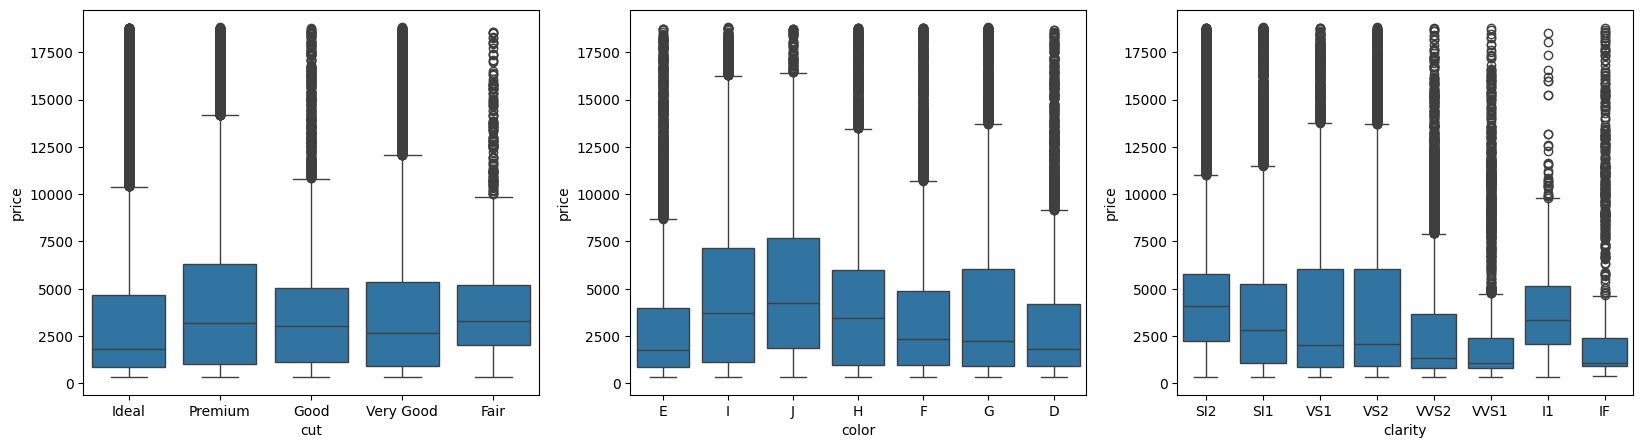

In [68]:
plt.figure(figsize=(20,5))
for i, col in enumerate(categorical_data, start=1):
    plt.subplot(1,3,i)
    sns.boxplot(data=df , x=col, y='price')
plt.show()

1. Premium cut diamonds  have the highest median price among all cuts.
2. Ideal cut diamonds, while top in cut quality, may be smaller in size on average, reducing their median price
3. The median price increases noticeably from E (lower) toward J (higher).
4. lower color grades (I, J) have higher median prices
5. VS1 and VS2 clarity show higher medians than IF (flawless), confirming that carat weight drives price more than clarity alone.

<Axes: >

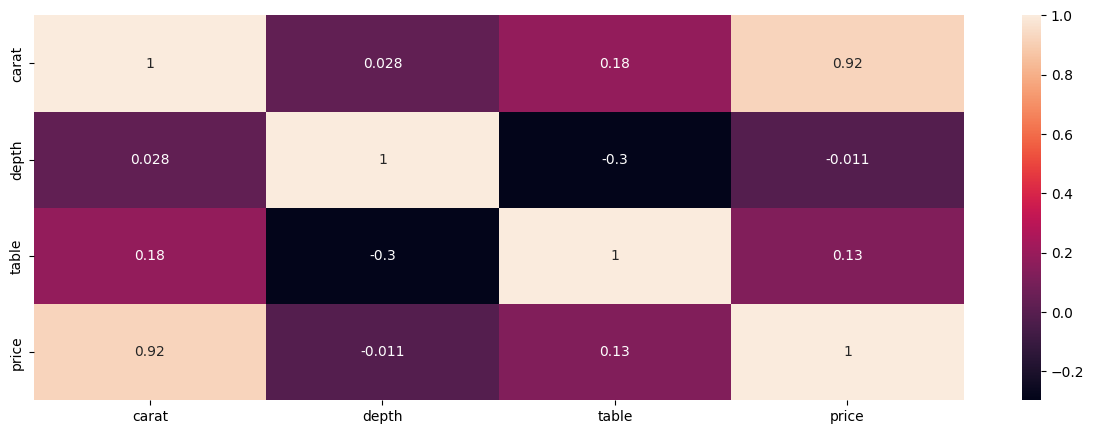

In [69]:
numerical_data = df.select_dtypes(include=["int64", "float64"]).drop(columns=["x", "y", "z"])
corrleation = numerical_data.corr()
plt.figure(figsize=(15,5))
sns.heatmap(data=corrleation, annot=True)

1. There is a big correlation between carat and price

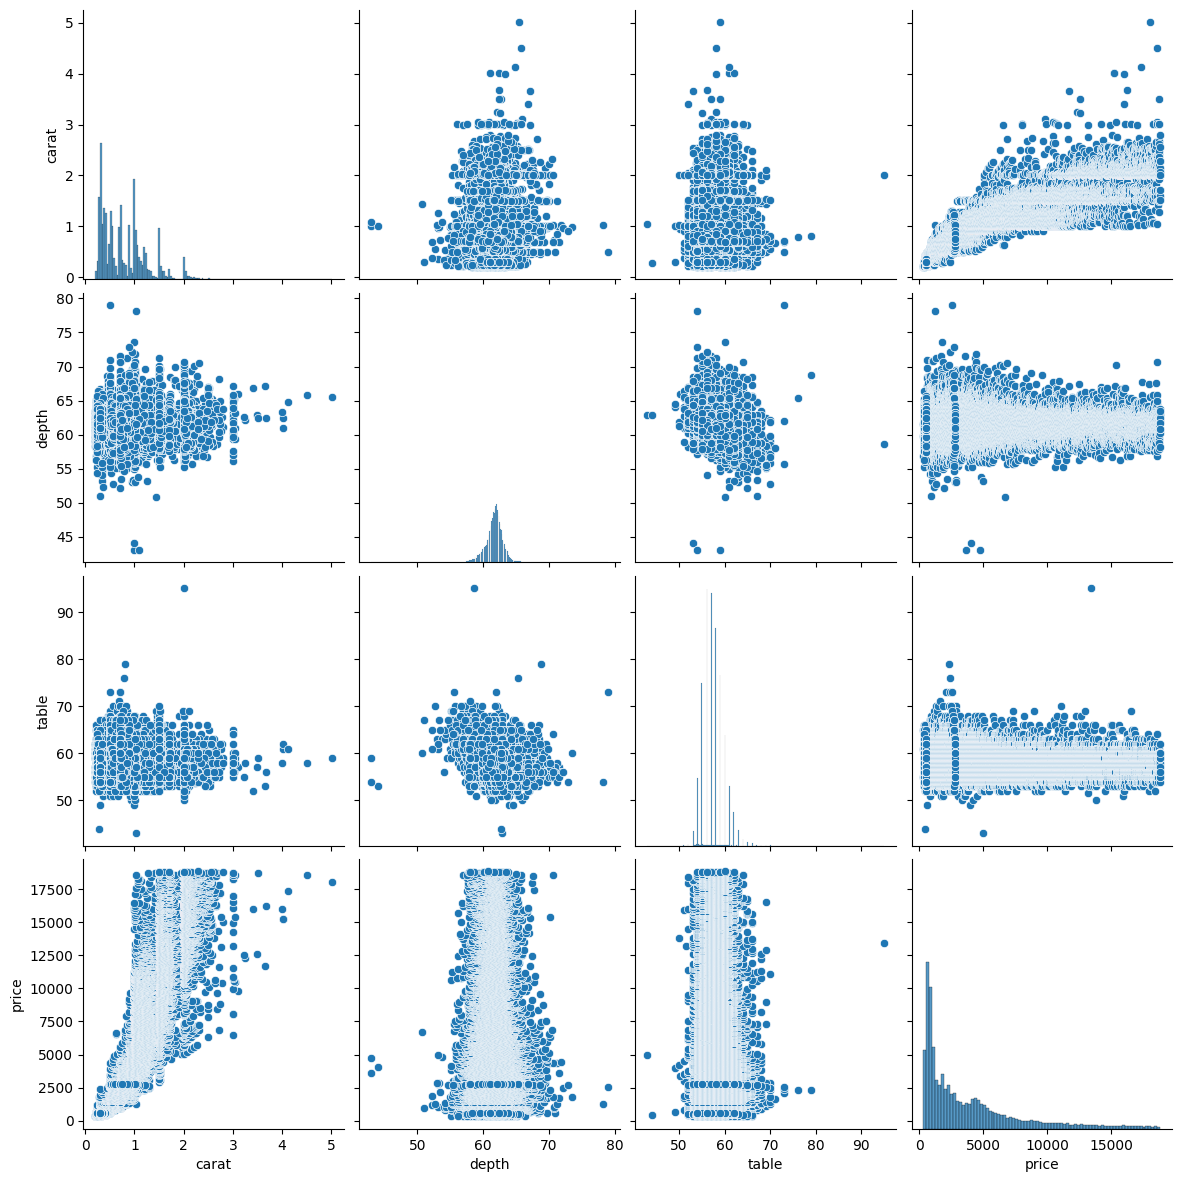

In [70]:

sns.pairplot(data=numerical_data, height=3)
plt.show()

1. There is a strong positive correlation between carat and price, The relationship is non-linear
2. Depth seems clustered around 60–65, but price does not strongly depend on depth.
3. Most table values cluster between 55–65, but high prices exist across this range
4. Carat is independent of both depth and table; no strong patterns are visible.

## Encoding Categorical Data

In [71]:
# clarity column is Oridnal Data so we will use map funcation or we can use labelencoding
clarity_order = {
    'IF': 1,
    'VVS1': 2,
    'VVS2': 3,
    'VS1': 4,
    'VS2': 5,
    'SI1': 6,
    'SI2': 7,
    'I1': 8
}

df['clarity_mapped'] = df['clarity'].map(clarity_order)
df

C:\Users\Elsherbiny\AppData\Local\Temp\ipykernel_11028\1679631994.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clarity_mapped'] = df['clarity'].map(clarity_order)


,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_mapped
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,7
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,6
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,7
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,6
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,6
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,6
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,7


In [72]:
# cut column is ordianl data so we can use labelEncoder
le = LabelEncoder()
df['cut_order'] = le.fit_transform(df['cut'])
df

C:\Users\Elsherbiny\AppData\Local\Temp\ipykernel_11028\1887701545.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cut_order'] = le.fit_transform(df['cut'])


,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_mapped,cut_order
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,7,2
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,6,3
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5,3
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,6,2
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,6,1
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,6,4
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,7,3


In [73]:
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
color_encoded = onehot_encoder.fit_transform(df[['color']])
color_df = pd.DataFrame(color_encoded, columns=onehot_encoder.get_feature_names_out(['color']), index=df.index)

In [74]:
df_combined = pd.concat([df, color_df], axis=1)  #
df_combined

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_mapped,cut_order,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,7,2,1.0,0.0,0.0,0.0,0.0,0.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,6,3,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,1,1.0,0.0,0.0,0.0,0.0,0.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5,3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,7,1,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,6,2,0.0,0.0,0.0,0.0,0.0,0.0
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,6,1,0.0,0.0,0.0,0.0,0.0,0.0
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,6,4,0.0,0.0,0.0,0.0,0.0,0.0
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,7,3,0.0,0.0,0.0,1.0,0.0,0.0


In [75]:
# new_data = df_combined.select_dtypes(["float64", "int64"]).drop(columns=["x", "y", "z"])
new_data = df_combined.select_dtypes(["float64", "int64"])
new_data

,carat,depth,table,price,x,y,z,clarity_mapped,cut_order,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,61.5,55.0,326,3.95,3.98,2.43,7,2,1.0,0.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,6,3,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,4,1,1.0,0.0,0.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,5,3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,7,1,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,6,2,0.0,0.0,0.0,0.0,0.0,0.0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,6,1,0.0,0.0,0.0,0.0,0.0,0.0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,6,4,0.0,0.0,0.0,0.0,0.0,0.0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,7,3,0.0,0.0,0.0,1.0,0.0,0.0


In [76]:
robust_cols = ['carat', 'price', 'x', 'y', 'z']
standard_cols = ['table', 'clarity_mapped', 'cut_order']

robust_scaler = RobustScaler()
standard_scaler = StandardScaler()

df_robust_scaled = pd.DataFrame(robust_scaler.fit_transform(df[robust_cols]), columns=robust_cols)
df_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(df[standard_cols]), columns=standard_cols)

scaled_df = pd.concat([df_robust_scaled, df_standard_scaled], axis=1)

scaled_df

,carat,price,x,y,z,table,clarity_mapped,cut_order
0,-0.734375,-0.474177,-0.956284,-0.950549,-0.982143,-1.100455,1.246013,-0.539026
1,-0.765625,-0.474177,-0.989071,-1.027473,-1.089286,1.585680,0.638793,0.434180
2,-0.734375,-0.473949,-0.901639,-0.901099,-1.089286,3.376438,-0.575646,-1.512232
3,-0.640625,-0.472349,-0.819672,-0.813187,-0.803571,0.242612,0.031574,0.434180
4,-0.609375,-0.472121,-0.743169,-0.747253,-0.696429,0.242612,1.246013,-1.512232
...,...,...,...,...,...,...,...,...
53786,0.031250,0.081353,0.027322,0.027473,-0.026786,-0.205077,0.638793,-0.539026
53787,0.031250,0.081353,-0.005464,0.021978,0.071429,-1.100455,0.638793,-1.512232
53788,0.000000,0.081353,-0.021858,-0.016484,0.026786,1.137991,0.638793,1.407387
53789,0.250000,0.081353,0.245902,0.225275,0.187500,0.242612,1.246013,0.434180
